# Very Basic Sentiment Analysis Tutorial

This is a Jupyter notebook that implements the tutorial described by [an article by Rashida Nasrin Sucky](https://towardsdatascience.com/a-complete-step-by-step-tutorial-on-sentiment-analysis-in-keras-and-tensorflow-ea420cc8913f).

## Data Preparation

Download the the dataset ["Reviews of Amazon Baby Products"](https://www.kaggle.com/datasets/sameersmahajan/reviews-of-amazon-baby-products?resource=download) before executing.

The first step in building sentiment analysis model, like all other ML models, is data preprocessing.

In [5]:
# Data Preparation
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

df = pd.read_csv('./amazon_baby.csv')
df['sentiments'] = df.rating.apply(lambda x: 0 if x in [1, 2] else 1)

## Splitting the Dataset
# 80% for training and 20% for testing.
split = round(len(df)*0.8)
train_reviews = df['review'][:split]
train_label = df['sentiments'][:split]
test_reviews = df['review'][split:]
test_label = df['sentiments'][split:]

## Guarantee Reviews are Strings
# This is to ensure that, should the data not be in string format,
# they will be proactively converted into a string.
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

for row in train_reviews:
    training_sentences.append(str(row))

for row in train_label:
    training_labels.append(row)

for row in test_reviews:
    testing_sentences.append(str(row))

for row in test_label:
    testing_labels.append(row)

## Additional constants
vocab_size = 40000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

## Initialize the Tokenizer
# A tokenizer identifies tokenizable elements in the data.
# Here, we tokenize the words and assign values to them.
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# This code block converts sentences in into sequences of words
# and then pads if necessary.
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length,
                       truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

## Model Development

Our algorithm will be a sequential model. The following is an exerpt from the source article:

-----

The first layer is the embedding layer where all the parameters have been defined and explained before. The second layer is ‘GlobalAveragePooling1D()’ flattens the vector. Originally the data is three-dimensional (batch_size x steps x features). GlobalAveragePooling1D makes it (batch_size x features).

The third layer is a Dense layer where a ‘relu’ activation function is used. You can try ‘tanh’ or any other activation function of your choice. This layer is called the hidden layer. I used only one hidden layer. Feel free to try with multiple hidden layers. More complex problems may require more hidden layers. Also, I used 6 neurons here in my hidden layer. You may wonder how to choose the number of neurons.

There are so many articles on that. [Here is a short article that provides some insights in brief](https://www.linkedin.com/pulse/choosing-number-hidden-layers-neurons-neural-networks-sachdev/).

The last layer uses the sigmoid activation function or logistic function.

-----

In [6]:
# Model Development
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           640000    
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 640109 (2.44 MB)
Trainable params: 640109 (2.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training the Model

Epoch 1/20


2024-02-25 22:22:09.603656: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-25 22:22:09.940376: I external/local_xla/xla/service/service.cc:168] XLA service 0x7febf08d2950 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-25 22:22:09.940397: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-02-25 22:22:09.948702: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-25 22:22:09.968189: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1708928530.007813   15429 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4589/4589 [==============================] - 53s 11ms/step - loss: 0.2955 - accuracy: 0.8793 - val_loss: 0.2129 - val_accuracy: 0.9125
Epoch 2/20
4589/4589 [==============================] - 36s 8ms/step - loss: 0.2130 - accuracy: 0.9121 - val_loss: 0.2046 - val_accuracy: 0.9148
Epoch 3/20
4589/4589 [==============================] - 34s 8ms/step - loss: 0.1982 - accuracy: 0.9190 - val_loss: 0.2040 - val_accuracy: 0.9158
Epoch 4/20
4589/4589 [==============================] - 36s 8ms/step - loss: 0.1893 - accuracy: 0.9227 - val_loss: 0.2088 - val_accuracy: 0.9147
Epoch 5/20
4589/4589 [==============================] - 33s 7ms/step - loss: 0.1822 - accuracy: 0.9264 - val_loss: 0.2062 - val_accuracy: 0.9153
Epoch 6/20
4589/4589 [==============================] - 34s 8ms/step - loss: 0.1761 - accuracy: 0.9286 - val_loss: 0.2087 - val_accuracy: 0.9156
Epoch 7/20
4589/4589 [==============================] - 34s 7ms/step - loss: 0.1709 - accuracy: 0.9311 - val_loss: 0.2091 - val_accuracy: 0.

<Figure size 640x480 with 0 Axes>

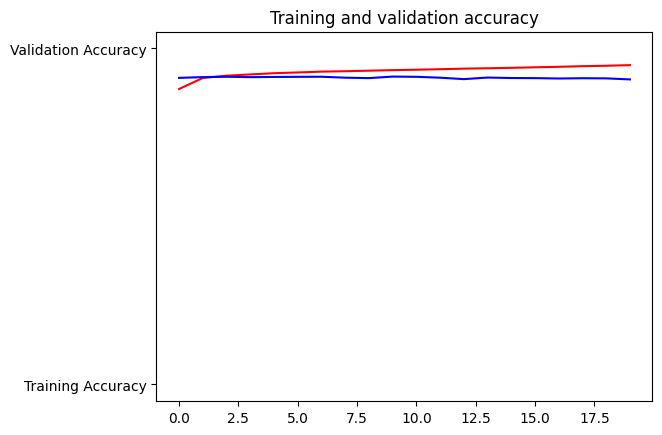

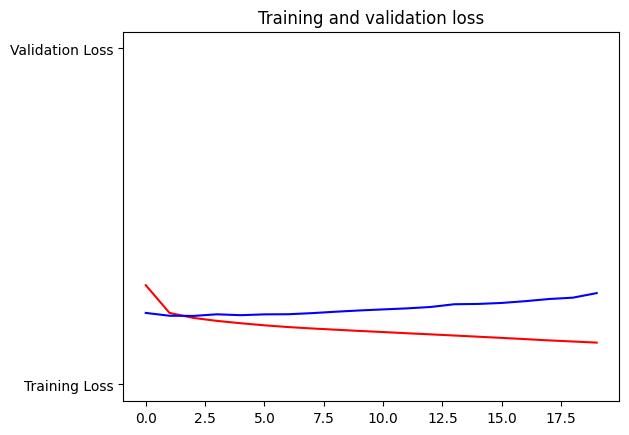

<Figure size 640x480 with 0 Axes>

In [7]:
# Model Training
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels_final))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()